# Credit Card Anomaly/Fraud Detection

Final Project for Unsupervised Algorithms in Machine Learning




### Table of Contents

- [1 Introduction](#introduction)
  - [1.1 Subject Background](#subject-background)
  - [1.2 Dataset](#dataset)
  - [1.3 Model Evaluation](#model-evaluation)
  - [1.4 Library Import](#library-import)
- [2 EDA/Data Preparation](#data-preparation)
  - [2.1 Data-Import](#data-import)
  - [2.2 Dataset](#dataset)
  - [2.3 Model Evaluation](#model-evaluation)
  - [2.4 Library Import](#library-import)

## 1 Introduction <a name="introduction"></a>

### 1.1 Subject Background  <a name="subject-background"></a>

Fraudulent activities related to credit cards have grown in complexity, thanks to the utilization of advanced technologies by criminals. Identifying anomalous transactions has become a challenging task, especially without prior reports from customers. Consequently, the incorporation of machine learning algorithms becomes essential when handling financial or sensitive customer data. These algorithms possess the capability to analyze large volumes of diverse data types, such as texts, images, and videos. By discerning patterns swiftly and accurately, they play a crucial role in detecting anomalies within seconds. Anomaly detection involves recognizing data points, items, observations, or events that deviate from the anticipated pattern within a specified group. While these anomalies are rare occurrences, they can signify substantial and noteworthy threats, such as cyber intrusions or fraud. The application of anomaly detection is prevalent in behavioral analysis and various analytical methodologies, facilitating the learning process related to detecting, identifying, and predicting the occurrence of these irregularities.

### 1.2 Dataset <a name="dataset"></a>

In the dataset, there are transactions executed using credit cards in the September of 2013, specifically by cardholders in Europe. Over a period of two days, there were only 492 instances of fraud out of a total of 284,807 transactions, resulting in a dataset that is markedly imbalanced. The positive class, which signifies fraudulent activities, represents a mere 0.172% of the entire transaction volume.  This will make it difficult 

The dataset exclusively consists of numerical input variables derived from a PCA transformation. Unfortunately, owing to confidentiality constraints, the original features and additional background information regarding the data remain undisclosed. Principal components V1 through V28 are the products of the PCA, while 'Time' and 'Amount' remain unaltered by this transformation. 'Time' signifies the seconds elapsed between each transaction and the initial transaction in the dataset, while 'Amount' denotes the transaction amount—a feature that finds utility, for instance, in example-dependent cost-sensitive learning. The 'Class' feature serves as the response variable, taking on a value of 1 in cases of fraud and 0 otherwise.

### 1.3 Model Evaluation <a name="model-evaluation"></a>

Due to the highly skewed nature of the data, with only 0.17% of transactions being fraudulent out of 280,000 samples, relying on accuracy is not a reliable metric. A model predicting all transactions as normal would achieve a misleadingly high accuracy of 99.83%.

In addressing this imbalance, it's essential to focus on metrics such as Recall, Precision, and their harmonic mean, the F1 score. I've made efforts to optimize each model's hyperparameters to achieve the best F1 score.

It's crucial to note that the models presented here do not consider the temporal sequences, despite having time as a distinct feature. To effectively handle the time series nature of anomaly detection, methods like RNN or LSTM may be more appropriate—though exploration of these approaches may be covered in a separate notebook.

It's worth mentioning that the training set deliberately excludes any instances of fraud. Consequently, when the model encounters fraudulent transactions in the test set, they stand out from the normal transactions. I've experimented with dividing the fraud instances, allocating half to a validation subset and half to the test set, observing a decrease in the F1 score.

### 1.4 Library Import <a name="library-import"></a>


In [73]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")


## 2 Data Preparation <a name="library-import"></a>

### 2.1 Data Import <a name="data-import"></a>

In [75]:
df = pd.read_csv("data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [43]:
df[df.columns].isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

data:  (284807, 31)
normal_data:  (284315, 31)
fraud_data:  (492, 31)
Percent fraud:  0.17305 %
____________________________________________________________________________________________________


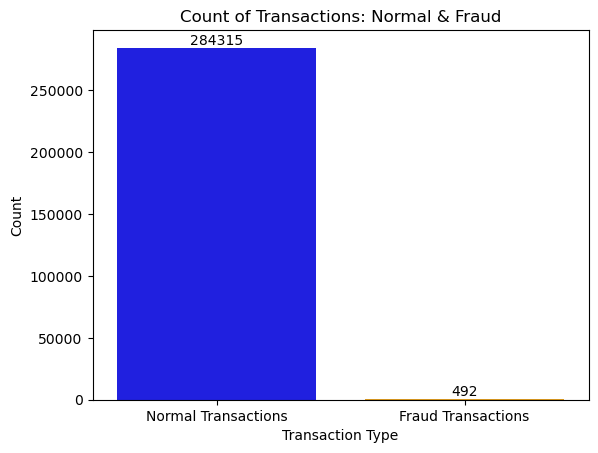

In [46]:
data = df.copy()
normal_data = data.loc[data["Class"] == 0]
fraud_data = data.loc[data["Class"] == 1]

print("data: ", data.shape)
print("normal_data: ", normal_data.shape)
print("fraud_data: ", fraud_data.shape)
print("Percent fraud: ", round(100 * fraud_data.shape[0] / normal_data.shape[0], 5), "%")
print("_" * 100)

values = [normal_data.shape[0], fraud_data.shape[0]]
colors = ['blue', 'orange']

ax = sns.barplot(x=['Normal Transactions', 'Fraud Transactions'], y=values, palette=colors)

plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Count of Transactions: Normal & Fraud')

for i, v in enumerate(values):
    ax.text(i, v + 50, str(v), ha='center', va='bottom')

plt.show()

In [15]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

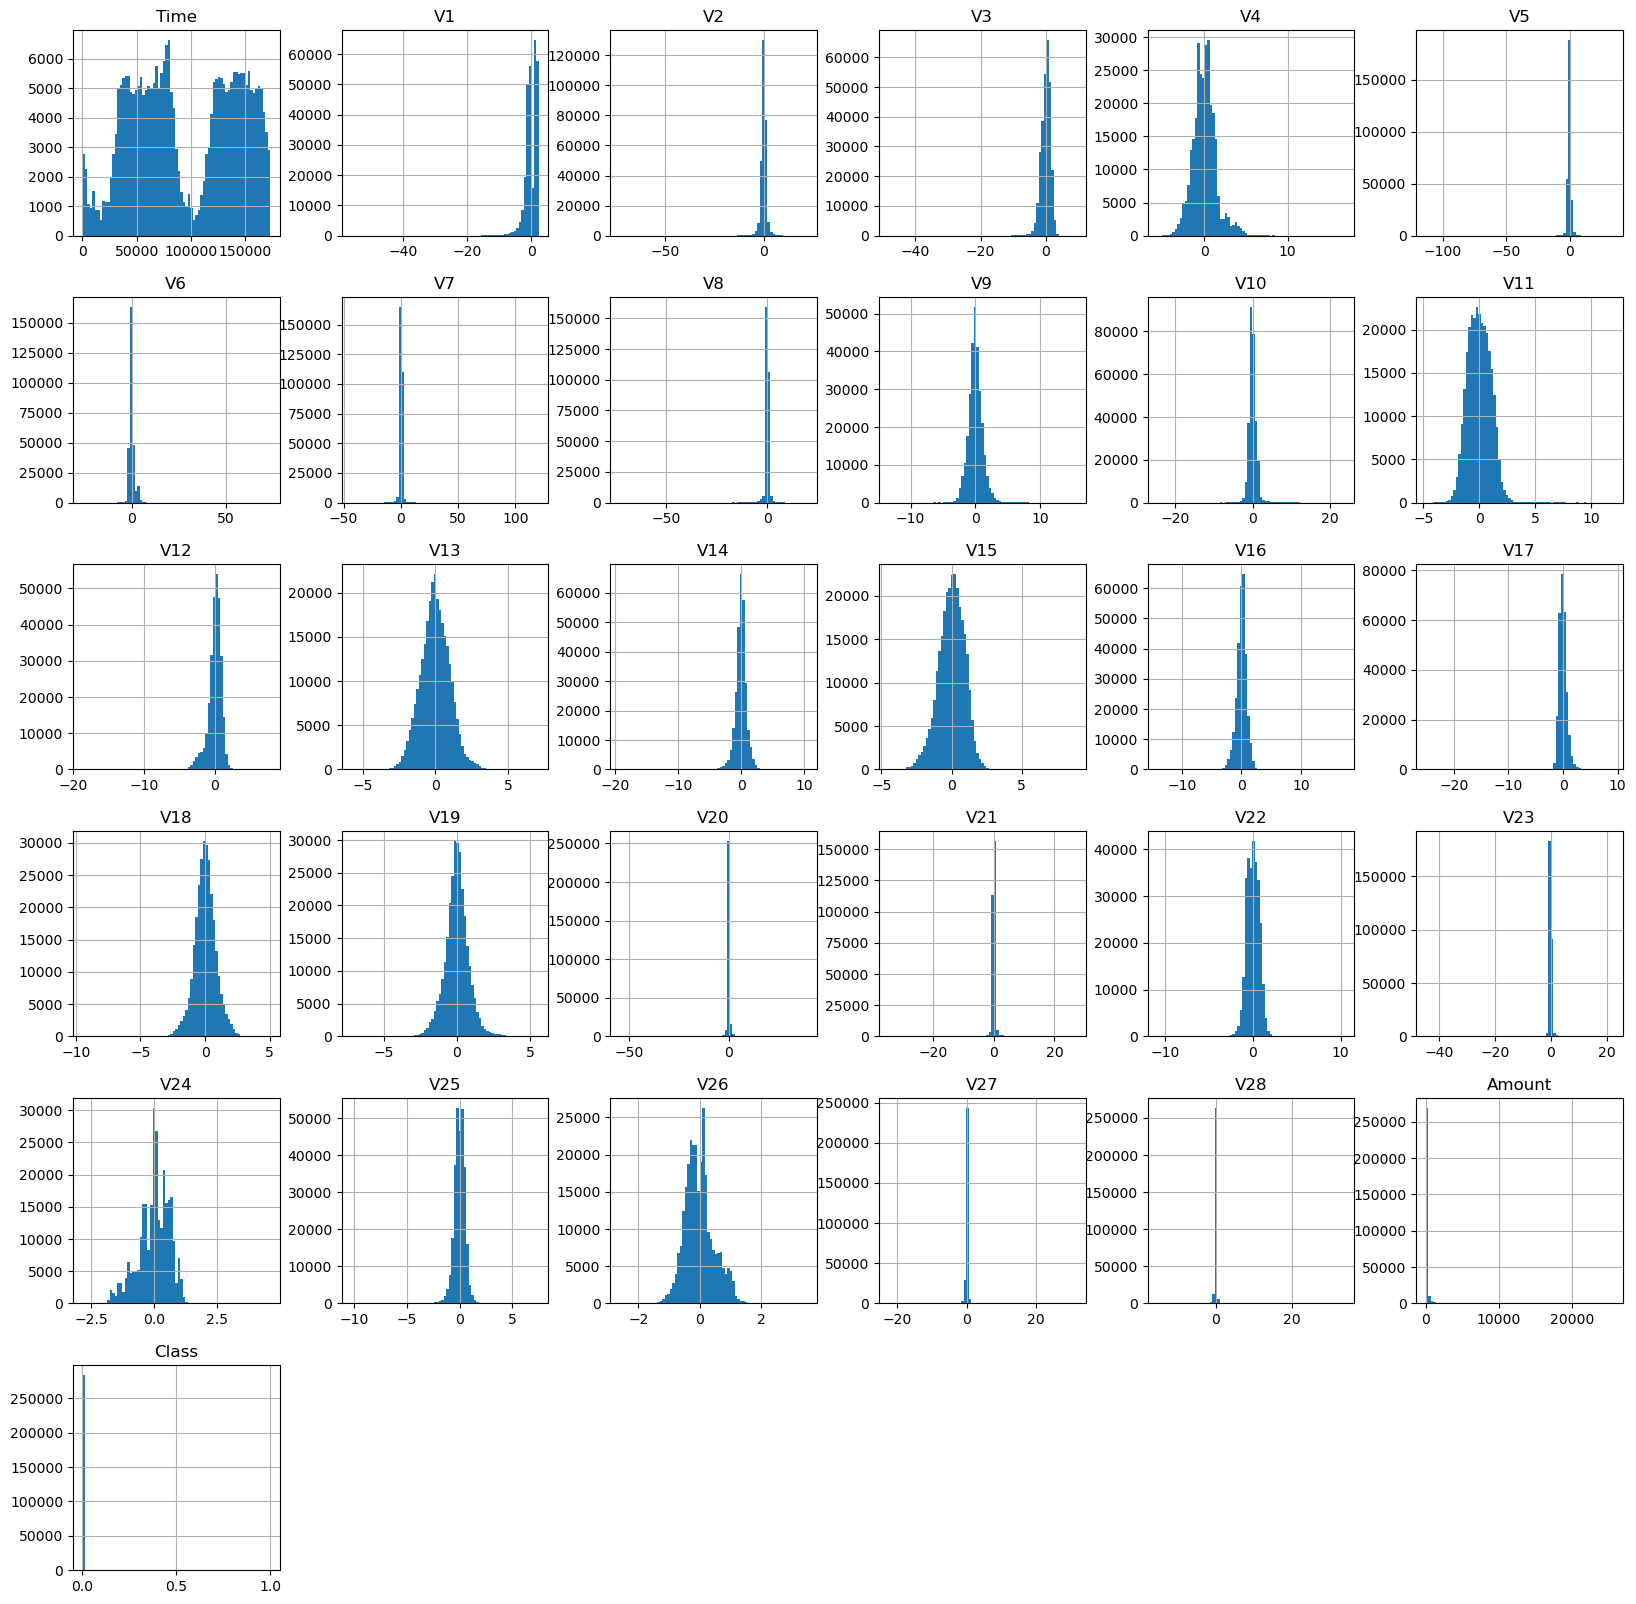

In [11]:
df.hist(bins = 75, figsize = (20,20))
plt.show()

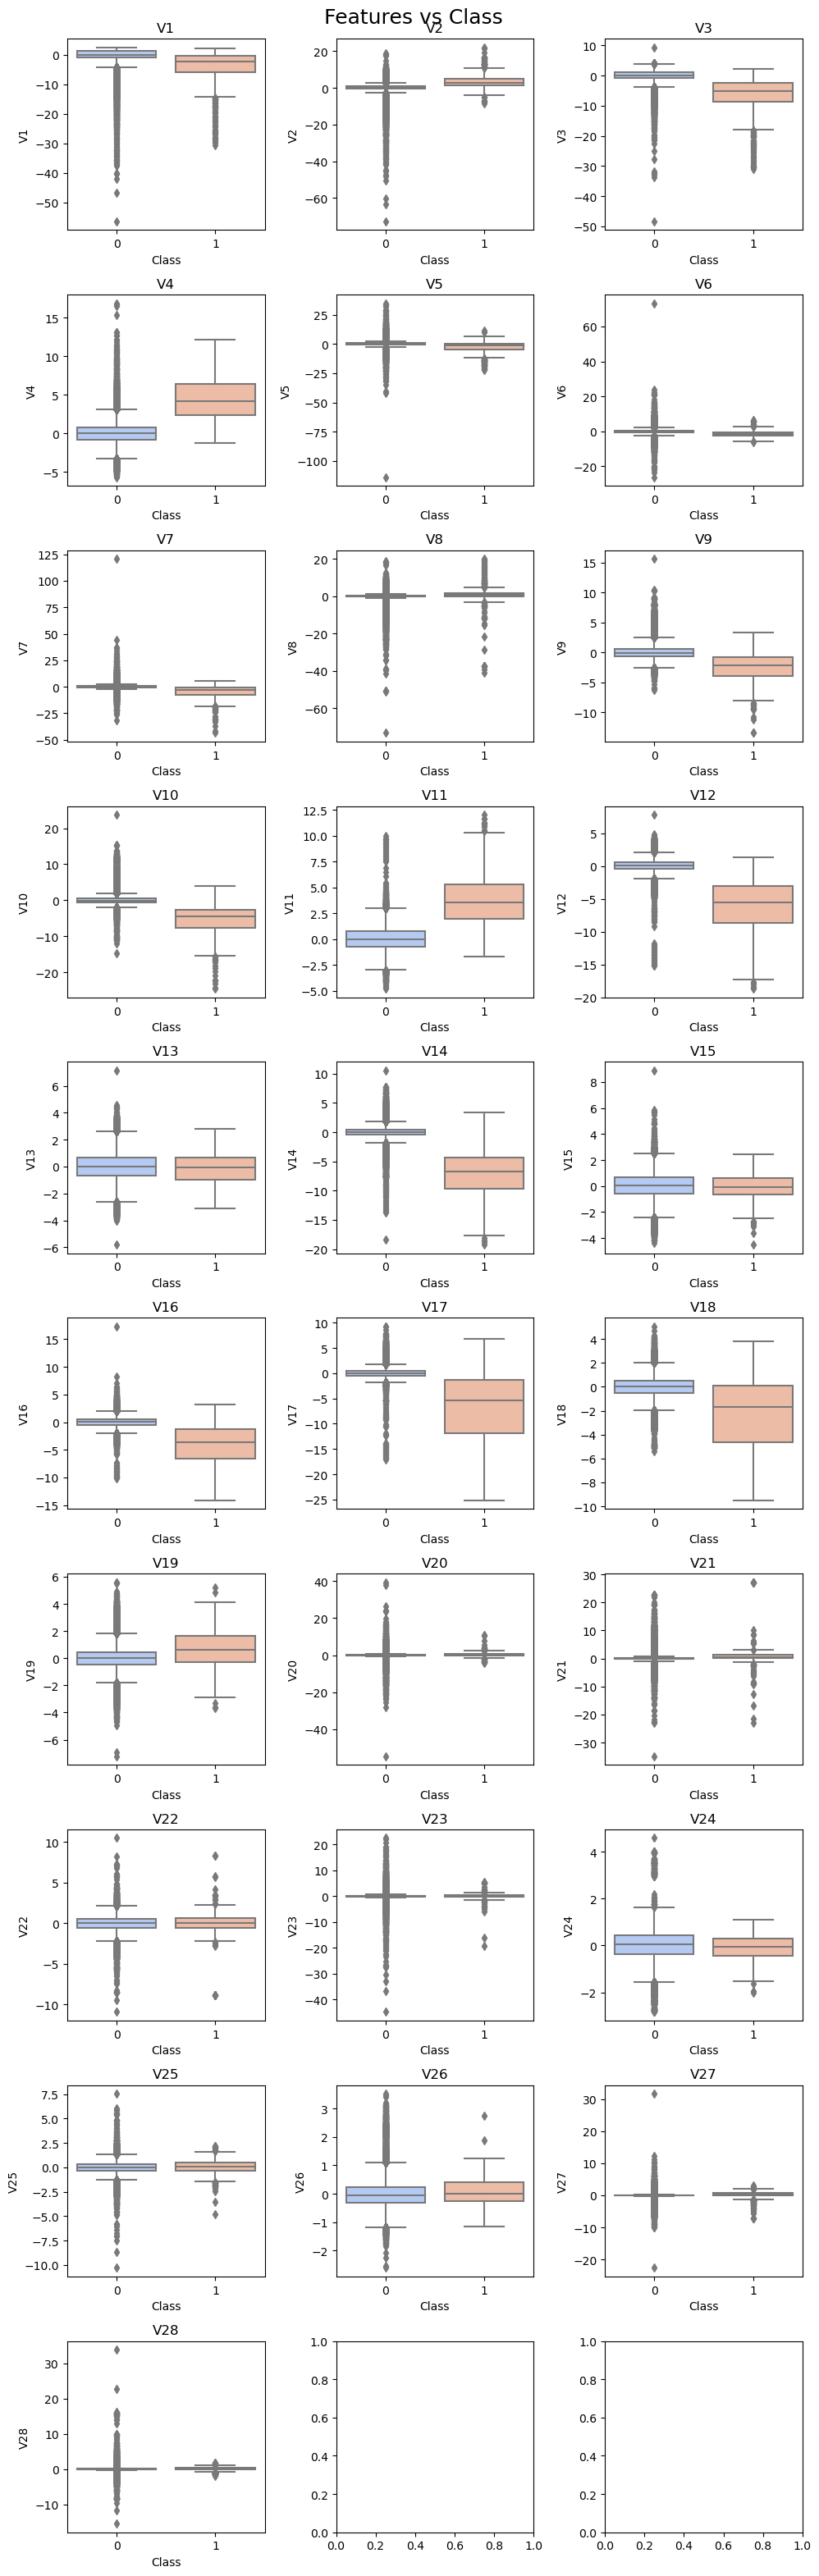

In [72]:


fig, axes = plt.subplots(nrows=10, ncols=3,figsize=(10,32))
fig.suptitle('Features vs Class\n', size = 18)

sns.boxplot(ax=axes[0, 0], data=df, x='Class', y='V1', palette='coolwarm')
axes[0,0].set_title("V1");

sns.boxplot(ax=axes[0, 1], data=df, x='Class', y='V2', palette='coolwarm')
axes[0,1].set_title("V2");

sns.boxplot(ax=axes[0, 2], data=df, x='Class', y='V3', palette='coolwarm')
axes[0,2].set_title("V3");

sns.boxplot(ax=axes[1, 0], data=df, x='Class', y='V4', palette='coolwarm')
axes[1,0].set_title("V4");

sns.boxplot(ax=axes[1, 1], data=df, x='Class', y='V5', palette='coolwarm')
axes[1,1].set_title("V5");

sns.boxplot(ax=axes[1, 2], data=df, x='Class', y='V6', palette='coolwarm')
axes[1,2].set_title("V6");

sns.boxplot(ax=axes[2, 0], data=df, x='Class', y='V7', palette='coolwarm')
axes[2,0].set_title("V7");

sns.boxplot(ax=axes[2, 1], data=df, x='Class', y='V8', palette='coolwarm')
axes[2,1].set_title("V8");

sns.boxplot(ax=axes[2, 2], data=df, x='Class', y='V9', palette='coolwarm')
axes[2,2].set_title("V9");

sns.boxplot(ax=axes[3, 0], data=df, x='Class', y='V10', palette='coolwarm')
axes[3,0].set_title("V10");

sns.boxplot(ax=axes[3, 1], data=df, x='Class', y='V11', palette='coolwarm')
axes[3,1].set_title("V11");

sns.boxplot(ax=axes[3, 2], data=df, x='Class', y='V12', palette='coolwarm')
axes[3,2].set_title("V12");

sns.boxplot(ax=axes[4, 0], data=df, x='Class', y='V13', palette='coolwarm')
axes[4,0].set_title("V13");

sns.boxplot(ax=axes[4, 1], data=df, x='Class', y='V14', palette='coolwarm')
axes[4,1].set_title("V14");

sns.boxplot(ax=axes[4, 2], data=df, x='Class', y='V15', palette='coolwarm')
axes[4,2].set_title("V15");

sns.boxplot(ax=axes[5, 0], data=df, x='Class', y='V16', palette='coolwarm')
axes[5,0].set_title("V16");

sns.boxplot(ax=axes[5, 1], data=df, x='Class', y='V17', palette='coolwarm')
axes[5,1].set_title("V17");

sns.boxplot(ax=axes[5, 2], data=df, x='Class', y='V18', palette='coolwarm')
axes[5,2].set_title("V18");

sns.boxplot(ax=axes[6, 0], data=df, x='Class', y='V19', palette='coolwarm')
axes[6,0].set_title("V19");

sns.boxplot(ax=axes[6, 1], data=df, x='Class', y='V20', palette='coolwarm')
axes[6,1].set_title("V20");

sns.boxplot(ax=axes[6, 2], data=df, x='Class', y='V21', palette='coolwarm')
axes[6,2].set_title("V21");

sns.boxplot(ax=axes[7, 0], data=df, x='Class', y='V22', palette='coolwarm')
axes[7,0].set_title("V22");

sns.boxplot(ax=axes[7, 1], data=df, x='Class', y='V23', palette='coolwarm')
axes[7,1].set_title("V23");

sns.boxplot(ax=axes[7, 2], data=df, x='Class', y='V24', palette='coolwarm')
axes[7,2].set_title("V24");

sns.boxplot(ax=axes[8, 0], data=df, x='Class', y='V25', palette='coolwarm')
axes[8,0].set_title("V25");

sns.boxplot(ax=axes[8, 1], data=df, x='Class', y='V26', palette='coolwarm')
axes[8,1].set_title("V26");

sns.boxplot(ax=axes[8, 2], data=df, x='Class', y='V27', palette='coolwarm')
axes[8,2].set_title("V27");

sns.boxplot(ax=axes[9, 0], data=df, x='Class', y='V28', palette='coolwarm')
axes[9,0].set_title("V28");

plt.tight_layout()



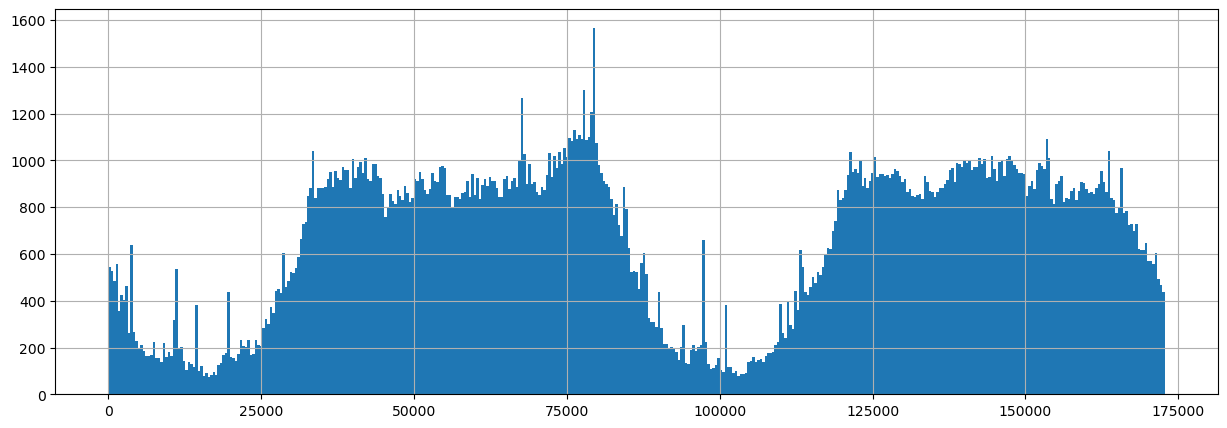

In [12]:
df['Time'].hist(bins = 425, figsize = (15,5))
plt.show()

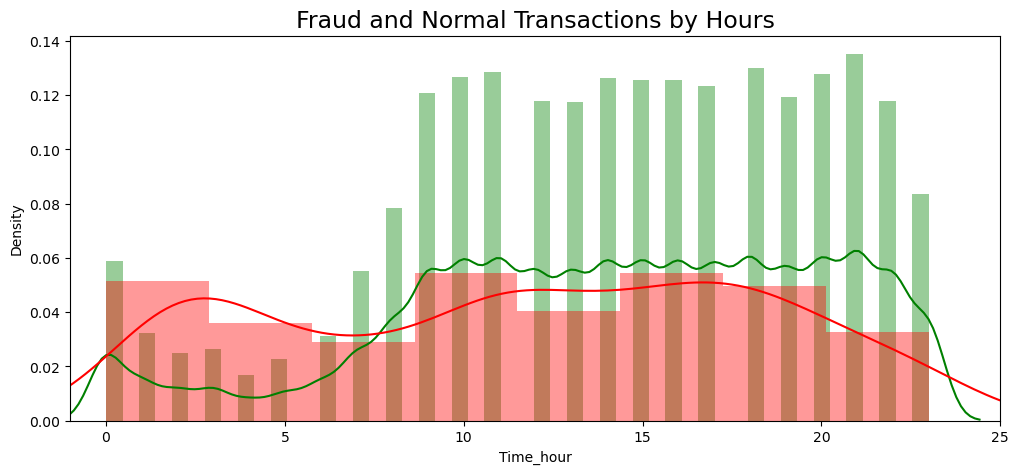

In [16]:
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

plt.figure(figsize=(12,5))
sns.distplot(df[df['Class'] == 0]["Time_hour"], color='g')
sns.distplot(df[df['Class'] == 1]["Time_hour"], color='r')
plt.title('Fraud and Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

In [17]:
cols= df[['Time', 'Amount']]

pca = PCA()
pca.fit(cols)
X_PCA = pca.transform(cols)

df['V29']=X_PCA[:,0]
df['V30']=X_PCA[:,1]

df.drop(['Time','Time_hour', 'Amount'], axis=1, inplace=True)

df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'V29', 'V30'],
      dtype='object')

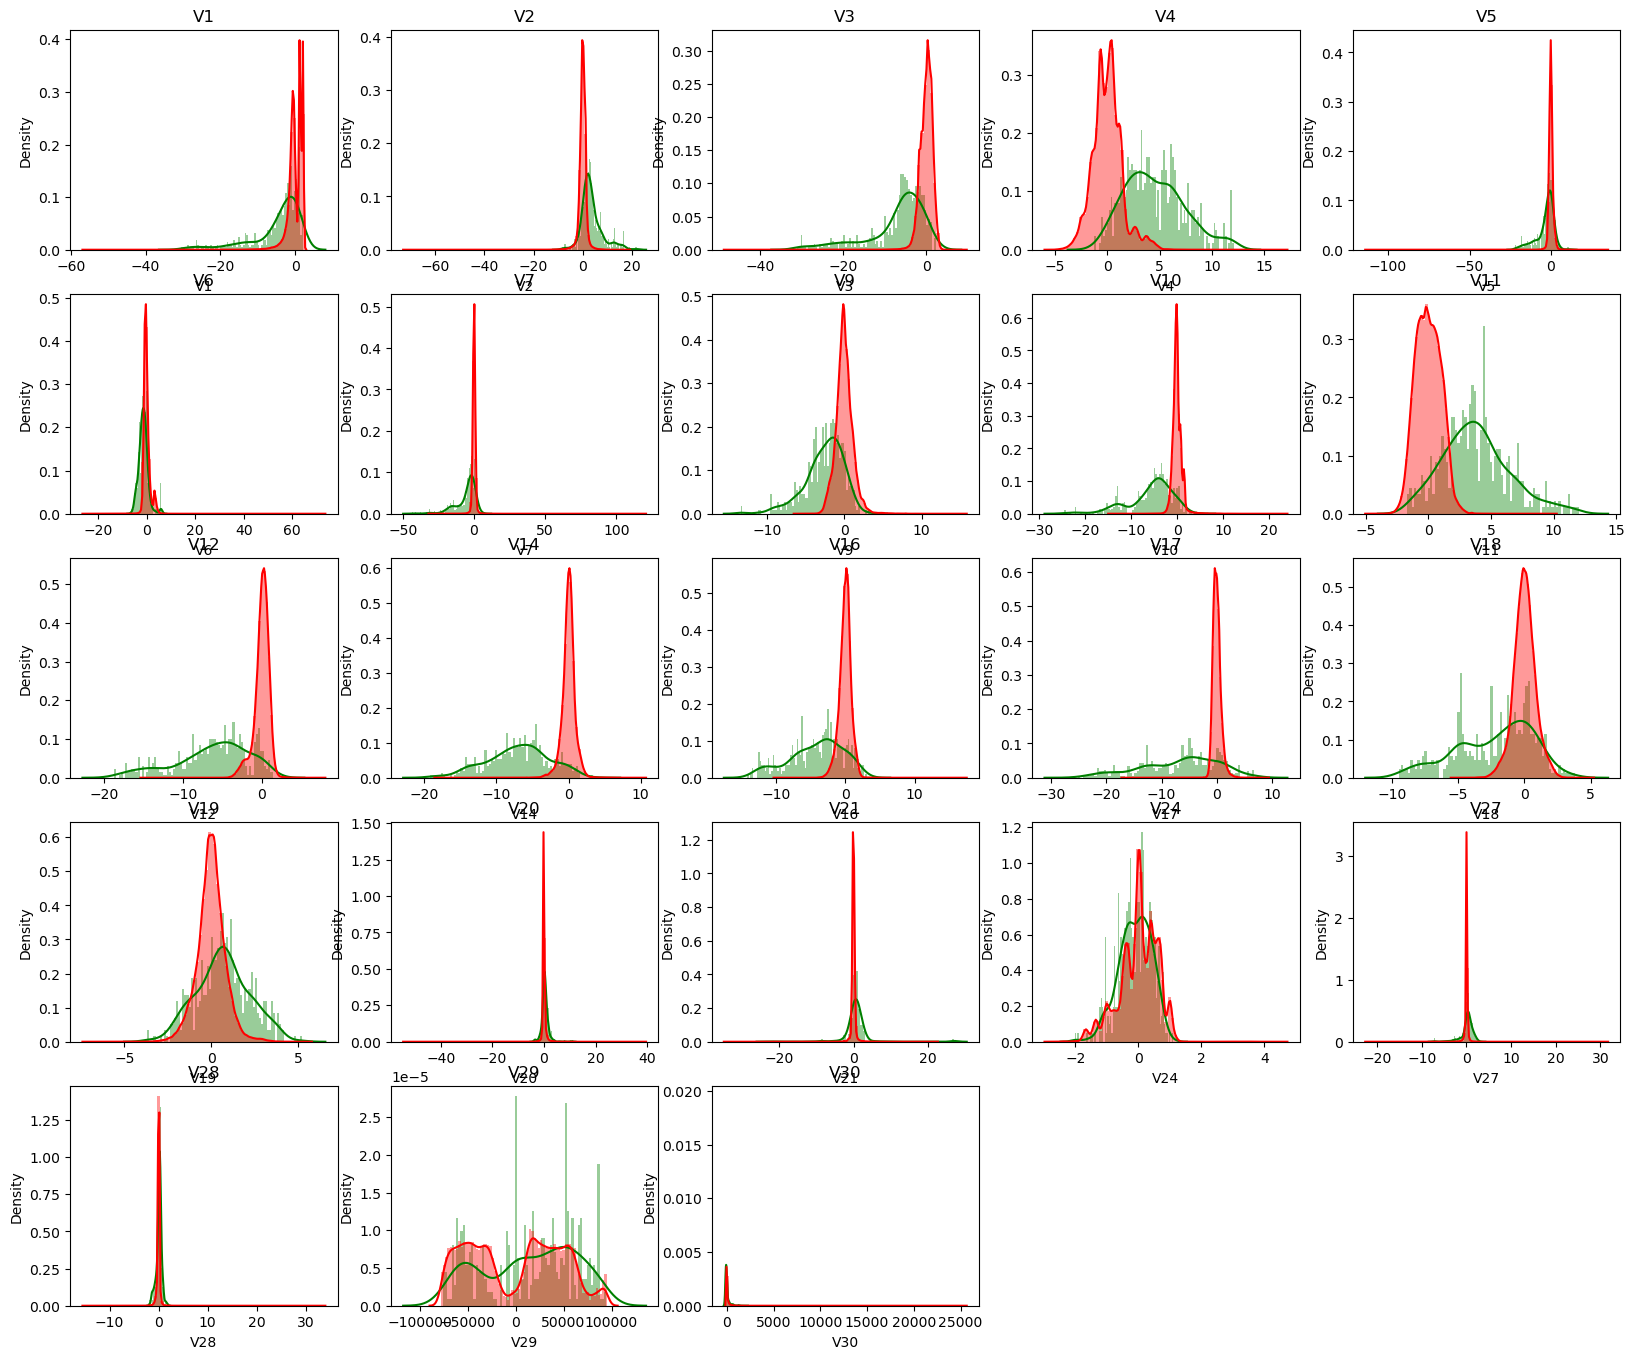

In [40]:
columns = df.drop('Class', axis=1).columns
grid = gridspec.GridSpec(6, 5)

plt.figure(figsize=(20,10*2))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[df.Class==1][col], bins = 75, color='g')
    sns.distplot(df[df.Class==0][col], bins = 75, color='r') 
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    
plt.show()

In [21]:
normal = df.loc[df['Class'] == 0, :]
normal.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,V29,V30
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0,284315.000000,284315.000000
mean,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,...,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,0.0,-24.342686,-0.057238
std,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,1.044204,...,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,0.0,47484.015860,250.090951
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,-14.741096,...,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.0,-77978.133123,-93.625693
25%,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,-0.532880,...,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,0.0,-44519.145015,-82.277511
50%,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,-0.091872,...,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,0.0,10102.859091,-66.013125
75%,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,0.455135,...,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,0.0,40583.856171,-11.176260
max,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,...,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,0.0,94813.862847,25606.794479


In [22]:
fraud = df.loc[df['Class'] == 1, :]
fraud.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,V29,V30
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0,492.000000,492.000000
mean,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,1.0,14067.054533,33.076582
std,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,4.897341,...,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,0.0,47835.364365,256.827237
min,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,...,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,1.0,-75534.142865,-93.618773
25%,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,-7.756698,...,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.0,-33669.141159,-87.926858
50%,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,...,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,1.0,19245.358925,-78.086369
75%,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,-2.614184,...,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,1.0,53572.358115,15.740840
max,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,...,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,1.0,94407.854497,2039.071642


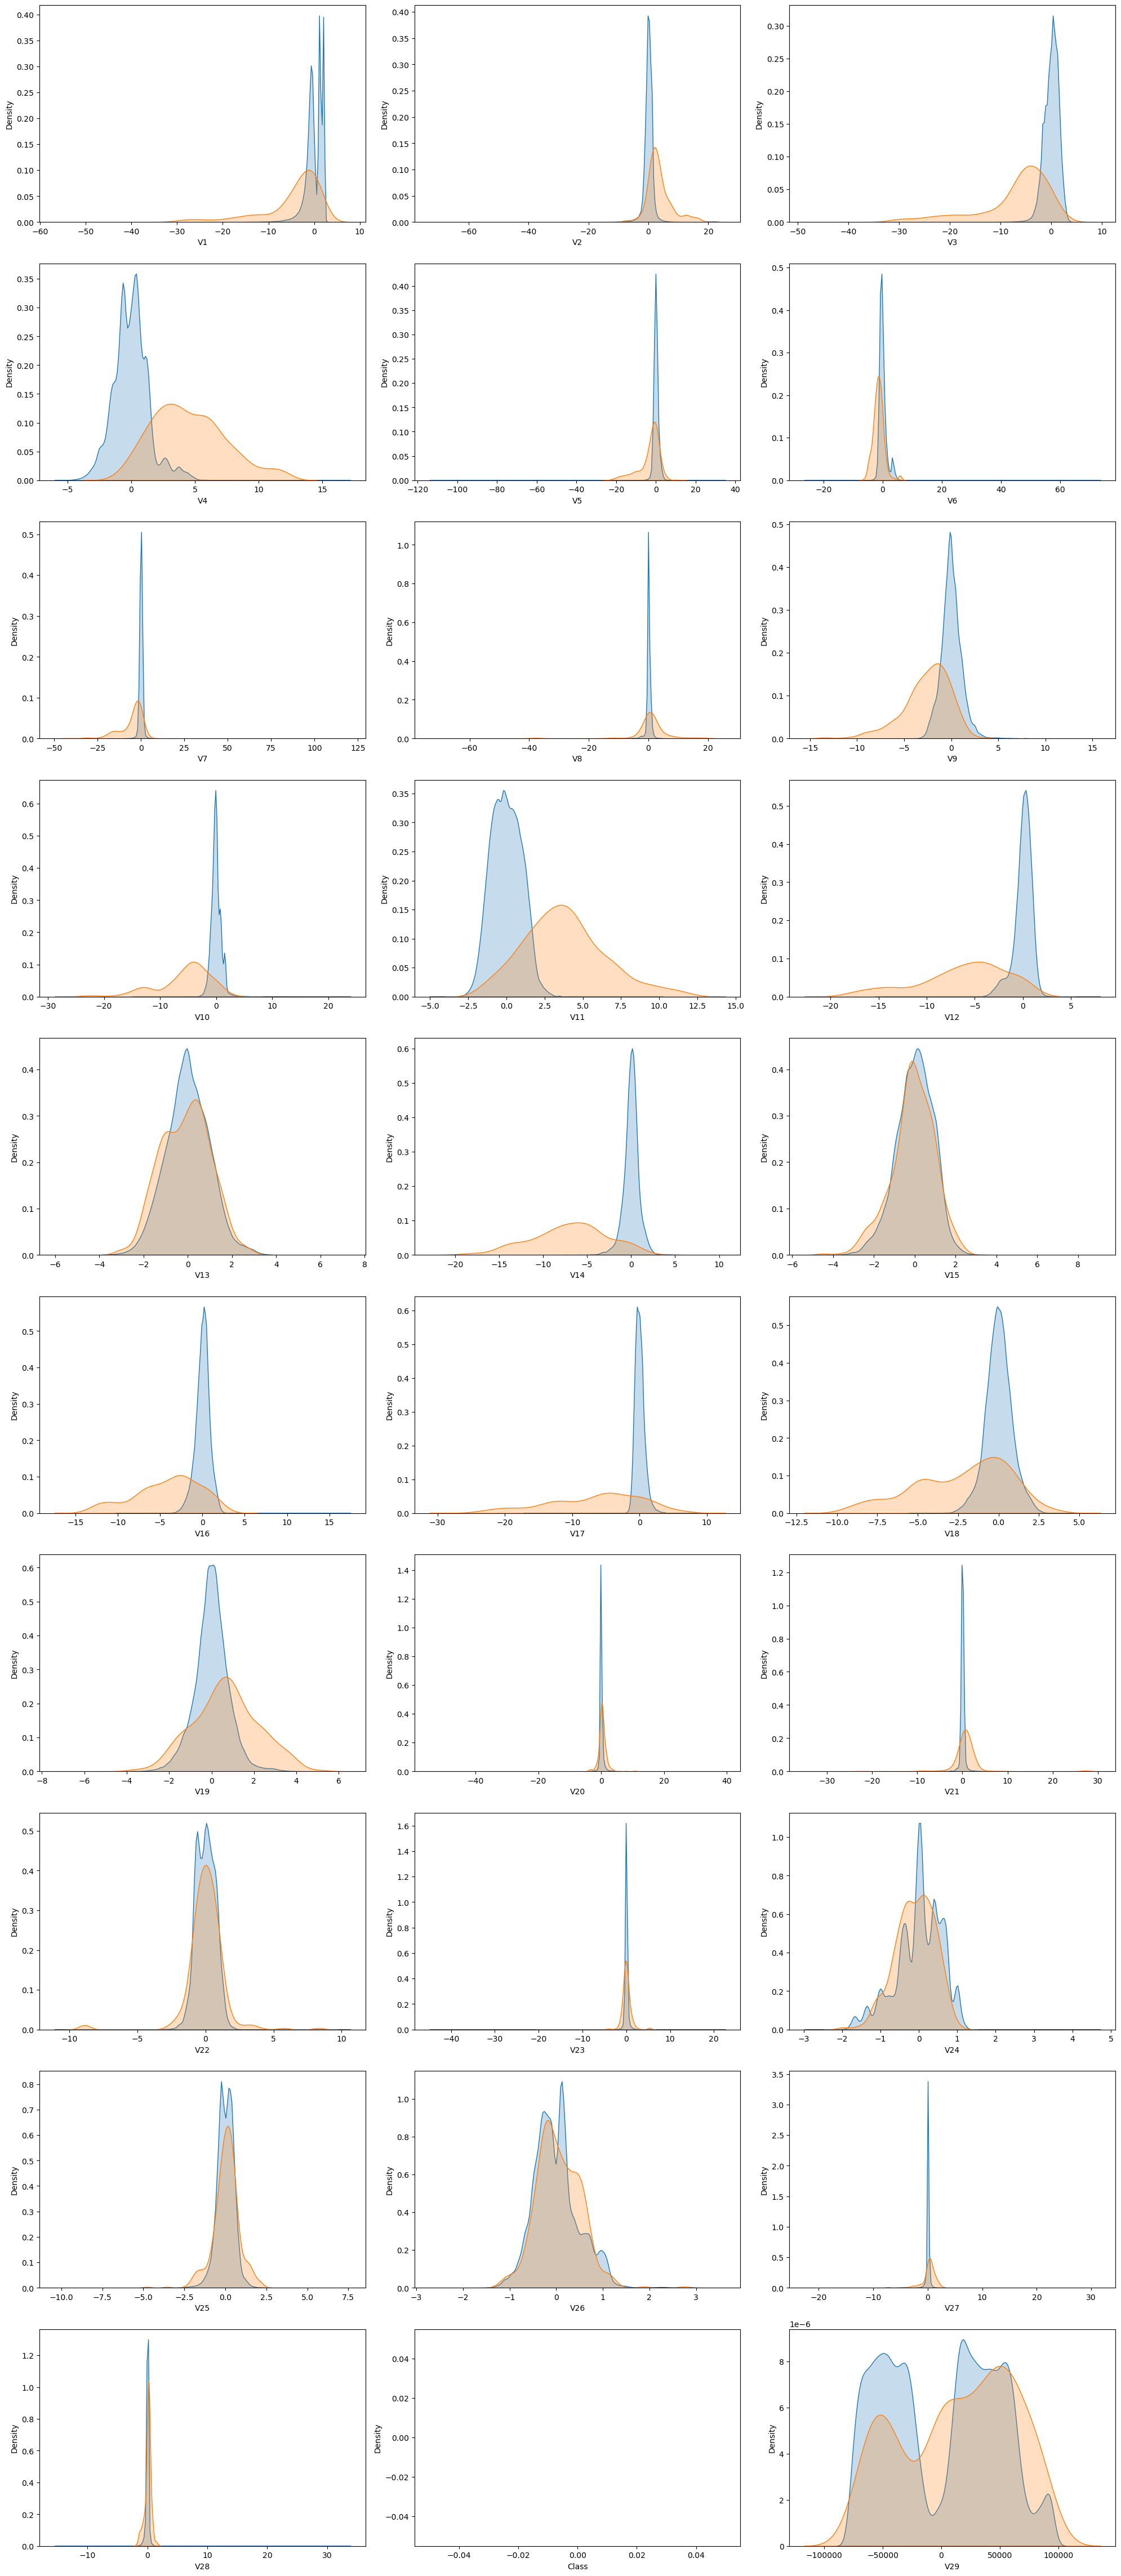

In [23]:
features = df.columns[:-1]

plt.figure(figsize=(20,50))
i=1
for feature in features:
    plt.subplot(11,3,i)
    sns.kdeplot(normal[feature], shade= True)
    sns.kdeplot(fraud[feature], shade= True)
    i=i+1
    plt.tight_layout()
plt.show()

In [24]:
def ztest(feature):
    
    mean = normal[feature].mean()
    std = fraud[feature].std()
    zScore = (fraud[feature].mean() - mean) / (std/np.sqrt(sample_size))
    
    return zScore

In [26]:
columns= df.drop('Class', axis=1).columns
normal= df[df.Class==0]
fraud= df[df.Class==1]
sample_size=len(fraud)
significant_features=[]
critical_value=2.58

for i in columns:
    
    z_vavlue=ztest(i)
    
    if( abs(z_vavlue) >= critical_value):    
        print(i," is statistically significant") #Reject Null hypothesis. i.e. H0
        significant_features.append(i)
    else:
        print(i," is NOT statistically significant")
print(significant_features)

V1  is statistically significant
V2  is statistically significant
V3  is statistically significant
V4  is statistically significant
V5  is statistically significant
V6  is statistically significant
V7  is statistically significant
V8  is NOT statistically significant
V9  is statistically significant
V10  is statistically significant
V11  is statistically significant
V12  is statistically significant
V13  is NOT statistically significant
V14  is statistically significant
V15  is NOT statistically significant
V16  is statistically significant
V17  is statistically significant
V18  is statistically significant
V19  is statistically significant
V20  is statistically significant
V21  is statistically significant
V22  is NOT statistically significant
V23  is NOT statistically significant
V24  is statistically significant
V25  is NOT statistically significant
V26  is NOT statistically significant
V27  is statistically significant
V28  is statistically significant
V29  is statistically signifi

In [27]:
significant_features.append('Class')
df= df[significant_features]

inliers = df[df.Class==0]
ins = inliers.drop(['Class'], axis=1)

outliers = df[df.Class==1]
outs = outliers.drop(['Class'], axis=1)

ins.shape, outs.shape

((284315, 23), (492, 23))

In [28]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,...,V18,V19,V20,V21,V24,V27,V28,V29,V30,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,...,0.025791,0.403993,0.251412,-0.018307,0.066928,0.133558,-0.021053,94813.862847,55.978567,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,...,-0.183361,-0.145783,-0.069083,-0.225775,-0.339846,-0.008983,0.014724,94813.854647,-90.951433,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,...,-0.121359,-2.261857,0.524980,0.247998,-0.689281,-0.055353,-0.059752,94812.875630,285.018623,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,...,1.965775,-1.232622,-0.208038,-0.108300,-1.175575,0.062723,0.061458,94812.861389,29.858623,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,...,-0.038195,0.803487,0.408542,-0.009431,0.141267,0.219422,0.215153,94811.858403,-23.651321,0
